In [13]:
import pandas as pd

print("testing")
data = pd.read_csv("./troop_movements.csv")
print(data.head())


testing
             timestamp  unit_id     unit_type empire_or_resistance  \
0  2024-07-11 09:58:43        1         at-st           resistance   
1  2024-07-11 09:58:42        2         at-st           resistance   
2  2024-07-11 09:58:41        3   tie_fighter           resistance   
3  2024-07-11 09:58:40        4  tie_silencer               empire   
4  2024-07-11 09:58:39        5  tie_silencer               empire   

   location_x  location_y  destination_x  destination_y    homeworld  
0           4           5              6             10        Cerea  
1           8           5              4              4  Aleen Minor  
2           6           2              5              8    Malastare  
3           1           1              3              8        Cerea  
4           6           3              4              8   Bestine IV  


In [14]:
factionCount = data.groupby("empire_or_resistance").size().reset_index(name="count")
print(factionCount)

  empire_or_resistance  count
0               empire    464
1           resistance    536


In [17]:
data['is_resistance'] = data['empire_or_resistance'] == 'resistance'
data['is_resistance'] = data['empire_or_resistance'] == 'empire'


data.head


<bound method NDFrame.head of                timestamp  unit_id           unit_type empire_or_resistance  \
0    2024-07-11 09:58:43        1               at-st           resistance   
1    2024-07-11 09:58:42        2               at-st           resistance   
2    2024-07-11 09:58:41        3         tie_fighter           resistance   
3    2024-07-11 09:58:40        4        tie_silencer               empire   
4    2024-07-11 09:58:39        5        tie_silencer               empire   
..                   ...      ...                 ...                  ...   
995  2024-07-11 09:42:08      996        tie_silencer               empire   
996  2024-07-11 09:42:07      997              x-wing           resistance   
997  2024-07-11 09:42:06      998               at-st           resistance   
998  2024-07-11 09:42:05      999        tie_silencer               empire   
999  2024-07-11 09:42:04     1000  resistance_soldier           resistance   

     location_x  location_y  dest

C:\Users\wasadmin\AppData\Local\Temp\ipykernel_4716\773643130.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="empire_or_resistance", y="count", data=factionCount, palette=custom_palette)


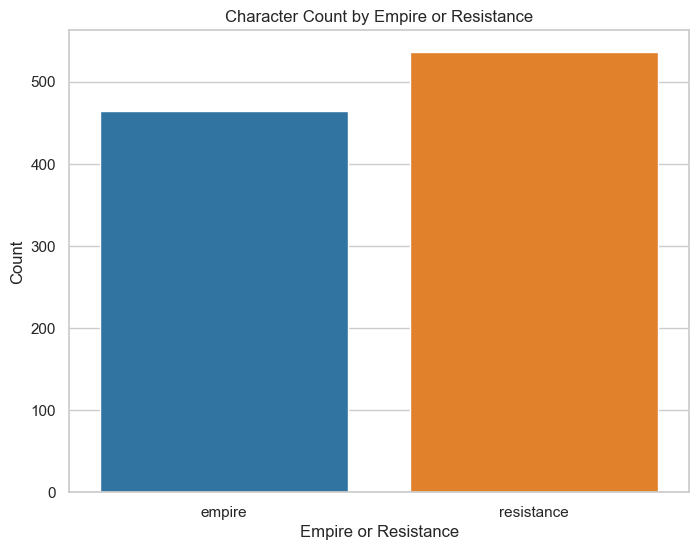

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.set_theme(style="whitegrid")
 
custom_palette = sns.color_palette(["#1f77b4", "#ff7f0e"])
 
plt.figure(figsize=(8, 6))
sns.barplot(x="empire_or_resistance", y="count", data=factionCount, palette=custom_palette)
plt.xlabel("Empire or Resistance")
plt.ylabel("Count")
plt.title("Character Count by Empire or Resistance")
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data_encoded = pd.get_dummies(data, columns=['homeworld', 'unit_type'])


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
rawX = data[["homeworld", "unit_type"]]
x = pd.get_dummies(rawX, columns=["homeworld", "unit_type"])
y = data["empire_or_resistance"]
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
 
y_pred = model.predict(x_test)
 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.43


In [39]:
importance = model.feature_importances_

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})


feature_importance = feature_importance.sort_values(by='Importance', ascending=false)
feature_importance.head()

ValueError: All arrays must be of the same length

In [ ]:
import pickle 

with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)